# Example: A Real-Valued Multi-Objective Optimization Problem

Below is a simple *two-variable* multi-objective problem to illustrate real-valued optimization with `pymoors`. We have two continuous decision variables, $x_1$ and $x_2$, both within a given range. We define **two** objective functions to be minimized simultaneously, and we solve this using the popular NSGA2 algorithm.

## Mathematical Formulation

Let $\mathbf{x} = (x_1, x_2)$ be our decision variables, each constrained to the interval $[-2, 2]$. We define the following objectives:

$$
\begin{aligned}
\min_{\mathbf{x}} \quad
&f_1(x_1, x_2) = x_1^2 + x_2^2 \\
\min_{\mathbf{x}} \quad
&f_2(x_1, x_2) = (x_1 - 1)^2 + x_2^2 \\
\text{subject to} \quad
& -2 \le x_1 \le 2, \\
& -2 \le x_2 \le 2.
\end{aligned}
$$

**Interpretation**

1. **$f_1$** measures the distance of $\mathbf{x}$ from the origin $(0,0)$ in the 2D plane.
2. **$f_2$** measures the distance of \(\mathbf{x}\) from the point $(1,0)$.

Thus, $\mathbf{x}$ must compromise between being close to $(0,0)$ and being close to $(1,0)$. There is no single point in $[-2,2]^2$ that *simultaneously* minimizes both distances perfectly (other than at the boundary of these trade-offs), so we end up with a **Pareto front** rather than a single best solution.

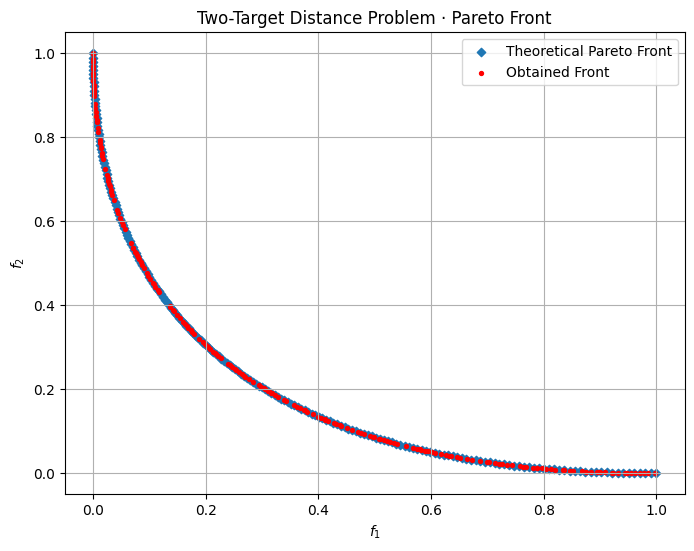

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pymoors import (
    Nsga2,
    RandomSamplingFloat,
    GaussianMutation,
    SimulatedBinaryCrossover,
    CloseDuplicatesCleaner,
)
from pymoors.typing import TwoDArray


def fitness(genes: TwoDArray) -> TwoDArray:
    x1 = genes[:, 0]
    x2 = genes[:, 1]
    # Objective 1: Distance to (0,0)
    f1 = x1**2 + x2**2
    # Objective 2: Distance to (1,0)
    f2 = (x1 - 1) ** 2 + x2**2
    # Combine the two objectives into a single array
    return np.column_stack([f1, f2])


algorithm = Nsga2(
    sampler=RandomSamplingFloat(min=-2, max=2),
    crossover=SimulatedBinaryCrossover(distribution_index=15),
    mutation=GaussianMutation(gene_mutation_rate=0.1, sigma=0.01),
    fitness=fitness,
    num_objectives=2,
    num_constraints=0,
    duplicates_cleaner=CloseDuplicatesCleaner(epsilon=1e-16),
    num_vars=2,
    population_size=200,
    num_offsprings=200,
    num_iterations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    keep_infeasible=False,
    lower_bound=-2,
    upper_bound=2,
    verbose=False,
)

algorithm.run()
population = algorithm.population

# Plot the results
t = np.linspace(0.0, 1.0, 200)
f1_theo = t**2
f2_theo = (t - 1.0) ** 2


plt.figure(figsize=(8, 6))
plt.scatter(f1_theo, f2_theo, marker="D", s=18, label="Theoretical Pareto Front")
plt.scatter(
    population.fitness[:, 0],
    population.fitness[:, 1],
    c="r",
    s=8,
    marker="o",
    label="Obtained Front",
)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.title("Two-Target Distance Problem · Pareto Front")
plt.grid(True)
plt.legend()
plt.show()